- 0 - Aortic enlargement
- 1 - Atelectasis
- 2 - Calcification
- 3 - Cardiomegaly
- 4 - Consolidation
- 5 - ILD
- 6 - Infiltration
- 7 - Lung Opacity
- 8 - Nodule/Mass
- 9 - Other lesion
- 10 - Pleural effusion
- 11 - Pleural thickening
- 12 - Pneumothorax
- 13 - Pulmonary fibrosis
- 14 - No findings

In [1]:
labels_csv = {'train': "/scratch/scratch6/akansh12/DeepEXrays/physionet.org/files/vindr-cxr/1.0.0/annotations/image_labels_train.csv",
             'test': "/scratch/scratch6/akansh12/DeepEXrays/physionet.org/files/vindr-cxr/1.0.0/annotations/image_labels_test.csv"
             }
data_dir = {'train': "/scratch/scratch6/akansh12/DeepEXrays/data/data_256/train/",
           'test': "/scratch/scratch6/akansh12/DeepEXrays/data/data_256/test/"}

In [2]:
import numpy as np
import pandas as pd
import os
from tqdm.notebook import tqdm

In [3]:
columns = ['image_id', 'rad_id', 'Aortic enlargement', 'Atelectasis','Calcification', 'Cardiomegaly', 'Consolidation','ILD', 'Infiltration','Lung Opacity','Nodule/Mass','Other lesion', 'Pleural effusion', 'Pleural thickening', 'Pneumothorax',
       'Pulmonary fibrosis', 'No finding']

In [4]:
orig_label_train = pd.read_csv(labels_csv['train'])

In [5]:
orig_label_train[columns].head(10)

,image_id,rad_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Consolidation,ILD,Infiltration,Lung Opacity,Nodule/Mass,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis,No finding
0,000434271f63a053c4128a0ba6352c7f,R2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,000434271f63a053c4128a0ba6352c7f,R3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,000434271f63a053c4128a0ba6352c7f,R6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,00053190460d56c53cc3e57321387478,R11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,00053190460d56c53cc3e57321387478,R2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,00053190460d56c53cc3e57321387478,R7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0005e8e3701dfb1dd93d53e2ff537b6e,R10,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
7,0005e8e3701dfb1dd93d53e2ff537b6e,R8,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
8,0005e8e3701dfb1dd93d53e2ff537b6e,R9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,0006e0a85696f6bb578e84fafa9a5607,R11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


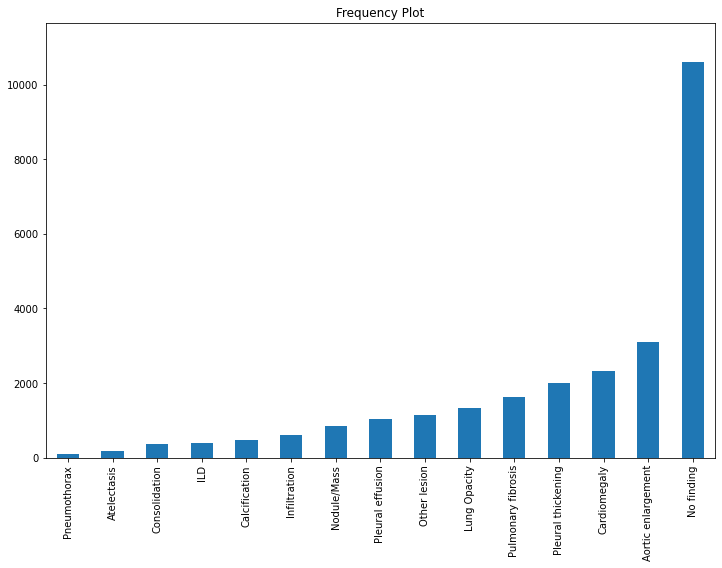

In [6]:
all_labels = np.delete(columns, [0,1])
count = []
for i in all_labels: 
    s = (15000- (np.sum(orig_label_train.groupby(['image_id']).sum()[i] == 0)))
    count.append(s)
    
Count = {}
for i,j in enumerate(all_labels):
    Count[j] = count[i]
df = pd.DataFrame(count, index = all_labels)
df = df.sort_values(by=[0])
ax = df.plot(kind = 'bar', figsize=(12, 8), title = 'Frequency Plot', legend = False)
# ax.bar_label(ax.containers[0], label_type='edge')
ax.margins(y=0.1)

In [7]:
df

,0
Pneumothorax,96
Atelectasis,187
Consolidation,353
ILD,397
Calcification,458
Infiltration,613
Nodule/Mass,841
Pleural effusion,1038
Other lesion,1154
Lung Opacity,1331


### Point of Contradictions

In [55]:
conflict = []
for i in np.unique(orig_label_train.set_index('image_id')[all_labels].index):
    if np.unique(orig_label_train.set_index('image_id')[all_labels].loc[i].values, axis=0, return_counts=True)[0].shape != (1,15):
        conflict.append(i)

In [57]:
len(conflict)

3811

In [ ]:
test_csv_org = pd.read_csv(labels_csv['test'])
test_csv = pd.DataFrame(columns=np.delete(columns, [1]))
test_csv['image_id'] = test_csv_org['image_id']
test_csv[all_labels] = test_csv_org[all_labels]
test_csv.to_csv('./labels/test.csv', index=False)

### Experiment 1

In [89]:
exp_1_train_csv = pd.DataFrame(columns=np.delete(columns, [1]))
exp_1_train_csv['image_id'] = orig_label_train['image_id']
exp_1_train_csv[all_labels] = orig_label_train[all_labels]
exp_1_train_csv.to_csv('./labels/exp_1.csv', index=False)

### Experiment 2

In [90]:
exp_2_train_org = pd.read_csv("/storage/home/akansh12/Vin-ChestXR-Abnormality-detection/Notebooks/weekly_supervised/new_image_labels_train.csv")
exp_2_train_csv = pd.DataFrame(columns=np.delete(columns, [1]))
exp_2_train_csv['image_id'] = exp_2_train_org['image_id']
exp_2_train_csv[all_labels] = exp_2_train_org[all_labels]
exp_2_train_csv.to_csv('./labels/exp_2.csv', index=False)

##### Wrong Annotations

In [49]:
exp_2_train = pd.read_csv("./labels/exp_2.csv")

In [50]:
exp_2_train.set_index('image_id', inplace=True)

In [51]:
wrong = []

for i in exp_2_train.index:
    if np.sum(exp_2_train.loc[i][['Aortic enlargement', 'Atelectasis', 'Calcification',
       'Cardiomegaly', 'Consolidation', 'ILD', 'Infiltration',
       'Lung Opacity', 'Nodule/Mass', 'Other lesion', 'Pleural effusion',
       'Pleural thickening', 'Pneumothorax', 'Pulmonary fibrosis']]) >= 1 and exp_2_train.loc[i]['No finding'] == 1:
        
        wrong.append(i)
        
    if np.sum(exp_2_train.loc[i][all_labels]) == 0:
        print(i)
print(len(wrong))

0


###### Correcting them exp_2

In [44]:
for i in exp_2_train.index:
    if np.sum(exp_2_train.loc[i][['Aortic enlargement', 'Atelectasis', 'Calcification',
       'Cardiomegaly', 'Consolidation', 'ILD', 'Infiltration',
       'Lung Opacity', 'Nodule/Mass', 'Other lesion', 'Pleural effusion',
       'Pleural thickening', 'Pneumothorax', 'Pulmonary fibrosis']]) >= 1 and exp_2_train.loc[i]['No finding'] == 1:
        
        exp_2_train.loc[i]['No finding'] = 0
        
    if np.sum(exp_2_train.loc[i][all_labels]) == 0:
        print(i)

In [45]:
wrong = []

for i in exp_2_train.index:
    if np.sum(exp_2_train.loc[i][['Aortic enlargement', 'Atelectasis', 'Calcification',
       'Cardiomegaly', 'Consolidation', 'ILD', 'Infiltration',
       'Lung Opacity', 'Nodule/Mass', 'Other lesion', 'Pleural effusion',
       'Pleural thickening', 'Pneumothorax', 'Pulmonary fibrosis']]) >= 1 and exp_2_train.loc[i]['No finding'] == 1:
        
        wrong.append(i)
        
    if np.sum(exp_2_train.loc[i][all_labels]) == 0:
        print(i)
print(len(wrong))

0


In [48]:
exp_2_train.to_csv('./labels/exp_2.csv')

### Experiment 3

In [100]:
three_agreement = []
for i in np.unique(orig_label_train.set_index('image_id')[all_labels].index):
    if np.unique(orig_label_train.set_index('image_id')[all_labels].loc[i].values, axis=0, return_counts=True)[0].shape == (1,15):
        three_agreement.append(i)

In [101]:
len(three_agreement)

11189

In [131]:
exp_3_train_csv = pd.DataFrame(columns=np.delete(columns, [1]))
exp_3_train_csv['image_id'] = three_agreement

In [132]:
exp_3_train_csv.set_index('image_id', inplace = True)

In [136]:
for i in three_agreement:
    exp_3_train_csv.loc[i] = orig_label_train.set_index('image_id')[all_labels].loc[i].values[0]

In [164]:
exp_3_train_csv.to_csv('./labels/exp_3.csv')

### Experiment 4

In [141]:
two_agreement = []
for i in tqdm(np.unique(orig_label_train.set_index('image_id')[all_labels].index)):
    if np.unique(orig_label_train.set_index('image_id')[all_labels].loc[i].values, axis=0, return_counts=True)[0].shape == (1,15) or np.unique(orig_label_train.set_index('image_id')[all_labels].loc[i].values, axis=0, return_counts=True)[0].shape == (2,15) :
        two_agreement.append(i)

  0%|          | 0/15000 [00:00<?, ?it/s]

In [143]:
len(two_agreement)

12971

In [168]:
exp_4_train_csv = pd.DataFrame(columns=np.delete(columns, [1]))
exp_4_train_csv['image_id'] = two_agreement
exp_4_train_csv.set_index('image_id', inplace = True)

In [169]:
for i in tqdm(two_agreement):
    exp_4_train_csv.loc[i] = np.unique(orig_label_train.set_index('image_id')[all_labels].loc[i], axis=0)[0]

  0%|          | 0/12971 [00:00<?, ?it/s]

In [173]:
exp_4_train_csv.to_csv('./labels/exp_4.csv')

### Experiment 5

In [8]:
ones = [0.65,0.95]
zeros = [0.10,0.35]

In [9]:
from scipy.stats import truncnorm

In [23]:
def get_truncated_normal(mean=0, sd=1, low=0.55, upp=0.85):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

ones = get_truncated_normal(mean=0, sd=1, low=0.65, upp=0.95)
zeros = get_truncated_normal(mean=0, sd=1, low=0.10, upp=0.35)

In [16]:
exp_5_train_csv = pd.DataFrame(columns=np.delete(columns, [1]))
exp_5_train_csv['image_id'] = np.unique(orig_label_train['image_id'])

In [17]:
exp_5_train_csv.set_index('image_id', inplace=True)

In [24]:
for i in tqdm(np.unique(orig_label_train['image_id'])):
    array = []
    for j in np.sum(orig_label_train.set_index('image_id')[all_labels].loc[i]).values:
        if j == 0:
            array.append(0)
        if j == 3:
            array.append(1)
        if j == 1:
            array.append(np.float16(zeros.rvs()))
        if j == 2:
            array.append(np.float16(ones.rvs()))
    exp_5_train_csv.loc[i] = np.array(array)

  0%|          | 0/15000 [00:00<?, ?it/s]

In [25]:
exp_5_train_csv

,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Consolidation,ILD,Infiltration,Lung Opacity,Nodule/Mass,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis,No finding
image_id,,,,,,,,,,,,,,,
000434271f63a053c4128a0ba6352c7f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
00053190460d56c53cc3e57321387478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0005e8e3701dfb1dd93d53e2ff537b6e,0.0,0.0,0.0,0.0,0.193848,0.0,0.330078,0.709473,0.205444,0.0,0.0,0.0,0.0,0.0,0.0
0006e0a85696f6bb578e84fafa9a5607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0007d316f756b3fa0baea2ff514ce945,0.669922,0.0,0.0,0.152344,0.0,0.29541,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.689941,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffe6f9fe648a7ec29a50feb92d6c15a4,0.223022,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.324463,0.0,0.0,0.0,0.0,0.0
ffea246f04196af602c7dc123e5e48fc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
ffeffc54594debf3716d6fcd2402a99f,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
exp_5_train_csv.to_csv('./labels/exp_5.csv')

### Experiment 6

#### Removing No findings that were also present in the Abnormality

In [55]:
exp_6_train_csv = pd.read_csv("./labels/exp_5.csv")

In [65]:
exp_6_train_csv.set_index('image_id', inplace=True)

In [69]:
wrong = []

for i in exp_6_train_csv.index:
    if np.sum(exp_6_train_csv.loc[i][['Aortic enlargement', 'Atelectasis', 'Calcification',
       'Cardiomegaly', 'Consolidation', 'ILD', 'Infiltration',
       'Lung Opacity', 'Nodule/Mass', 'Other lesion', 'Pleural effusion',
       'Pleural thickening', 'Pneumothorax', 'Pulmonary fibrosis']]) > 0 and exp_6_train_csv.loc[i]['No finding'] > 0:
        
        wrong.append(i)
        
    if np.sum(exp_6_train_csv.loc[i][all_labels]) == 0:
        print(i)

print(len(wrong))

0


In [68]:
### Correction
for i in exp_6_train_csv.index:
    if np.sum(exp_6_train_csv.loc[i][['Aortic enlargement', 'Atelectasis', 'Calcification',
       'Cardiomegaly', 'Consolidation', 'ILD', 'Infiltration',
       'Lung Opacity', 'Nodule/Mass', 'Other lesion', 'Pleural effusion',
       'Pleural thickening', 'Pneumothorax', 'Pulmonary fibrosis']]) > 0 and exp_6_train_csv.loc[i]['No finding'] > 0:
        
        exp_6_train_csv.loc[i]['No finding'] = 0

    if np.sum(exp_6_train_csv.loc[i][all_labels]) == 0:
        print(i)


125


In [70]:
exp_6_train_csv.to_csv("./labels/exp_6.csv")

### Experiment 7

Making it 14 class classification removing 15th class

In [8]:
all_labels

array(['Aortic enlargement', 'Atelectasis', 'Calcification',
       'Cardiomegaly', 'Consolidation', 'ILD', 'Infiltration',
       'Lung Opacity', 'Nodule/Mass', 'Other lesion', 'Pleural effusion',
       'Pleural thickening', 'Pneumothorax', 'Pulmonary fibrosis',
       'No finding'], dtype='<U18')

In [9]:
new_labels = np.delete(all_labels, [-1])

In [10]:
new_labels

array(['Aortic enlargement', 'Atelectasis', 'Calcification',
       'Cardiomegaly', 'Consolidation', 'ILD', 'Infiltration',
       'Lung Opacity', 'Nodule/Mass', 'Other lesion', 'Pleural effusion',
       'Pleural thickening', 'Pneumothorax', 'Pulmonary fibrosis'],
      dtype='<U18')

In [11]:
exp_6_df = pd.read_csv("./labels/exp_6.csv")
test_df = pd.read_csv("./labels/test.csv")

In [24]:
test_df

,image_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Consolidation,ILD,Infiltration,Lung Opacity,Nodule/Mass,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis,No finding
0,e0dc2e79105ad93532484e956ef8a71a,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0
1,0aed23e64ebdea798486056b4f174424,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
2,aa15cfcfca7605465ca0513902738b95,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,665c4a6d2693dc0286d65ab479c9b169,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,42da2c134b53cb5594774d3d29faac59,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,a039af299f86007d0d77da077a6def9a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2996,aba3d1f5b1c04236f52a8980929b2cfa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2997,6d3d6b53f358a983b486e9e03144eb62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2998,d6678cb7ae39f575d35ab9da6d7cb171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [26]:
exp_6_df.set_index('image_id', inplace = True)

In [44]:
exp_6_df.drop(exp_6_df[exp_6_df['No finding'] == 1].index.values, inplace = True)

In [45]:
exp_6_df

,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Consolidation,ILD,Infiltration,Lung Opacity,Nodule/Mass,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis,No finding
image_id,,,,,,,,,,,,,,,
0005e8e3701dfb1dd93d53e2ff537b6e,0.000000,0.000000,0.000000,0.000000,0.193848,0.00000,0.330078,0.709473,0.205444,0.000000,0.0,0.000000,0.0,0.000000,0.0
0007d316f756b3fa0baea2ff514ce945,0.669922,0.000000,0.000000,0.152344,0.000000,0.29541,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.689941,0.0
000d68e42b71d3eac10ccc077aba07c1,0.269287,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.784668,0.000000,1.000000,0.0,0.123596,0.0,0.244629,0.0
00150343289f317a0ad5629d5b7d9ef9,1.000000,0.000000,0.000000,0.233398,0.000000,0.00000,0.000000,0.804199,0.000000,0.145508,1.0,0.874512,0.0,0.310791,0.0
001d127bad87592efe45a5c7678f8b8d,0.000000,0.000000,0.307129,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff924bcbd38f123aec723aa7040d7e43,0.000000,0.922363,0.000000,0.000000,0.748535,0.00000,0.000000,0.339355,0.000000,0.000000,1.0,1.000000,0.0,1.000000,0.0
ffb5d0b005261ed350f7a08c06613a34,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
ffceb71a80efba3b83c88e11f4b9694b,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.707520,0.0


In [46]:
exp_6_df.drop("No finding", axis = 1, inplace = True)

In [56]:
exp_6_df.to_csv("./labels/exp_7_correct.csv", index=True)

In [49]:
test_df.set_index('image_id', inplace = True)

In [50]:
test_df.drop(test_df[test_df['No finding'] == 1].index.values, inplace = True)

In [51]:
test_df

,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Consolidation,ILD,Infiltration,Lung Opacity,Nodule/Mass,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis,No finding
image_id,,,,,,,,,,,,,,,
e0dc2e79105ad93532484e956ef8a71a,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0
0aed23e64ebdea798486056b4f174424,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
aa15cfcfca7605465ca0513902738b95,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
665c4a6d2693dc0286d65ab479c9b169,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
42da2c134b53cb5594774d3d29faac59,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9c91dd728f43b2c18c80674c11321fb4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
660579a438aedc7960b0bea9640c2df1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
706814b8f626ce46d5614029ec51dc44,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0


In [55]:
# test_df.drop("No finding", axis = 1, inplace = True)
test_df.to_csv("./labels/test_wo-nf.csv")